<a href="https://colab.research.google.com/github/nathsmo/Elements-of-ML/blob/master/Arboles_ejercicio_en_clase_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install seaborn==0.9

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

In [0]:
%matplotlib inline
plt.style.use("seaborn-white")

In [4]:
df = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/College.csv", index_col=0).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [5]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Solo vamos a utilizar a los `Years` o años que lleva jugando el jugador  en las grandes ligas junto con `Hits`  para predecir el `salary`. Además, existe una gran discrepancia en los rangos de salarios, por lo que aplicamos el logaritmo de éstos y así obtenemos una campana más normal.

Text(0.5, 0, 'Expend')

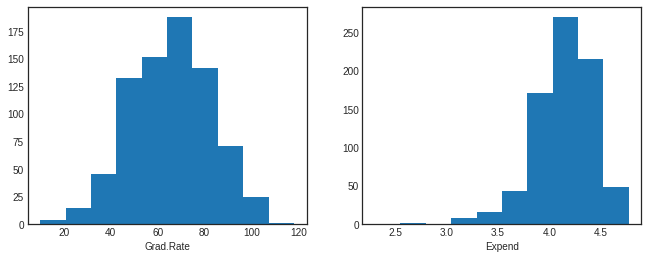

In [12]:
X = df[['Expend', "perc.alumni"]].as_matrix()
y = np.log(df['Grad.Rate'].as_matrix())

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))
ax1.hist(df['Grad.Rate'].as_matrix())
ax1.set_xlabel('Grad.Rate')
ax2.hist(y)
ax2.set_xlabel('Expend')

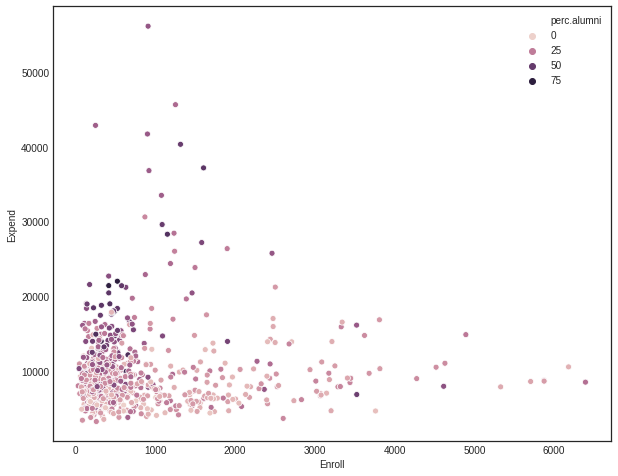

In [24]:
plt.subplots(figsize=(10,8))
sns.scatterplot(x="Enroll", y="Expend", hue="perc.alumni", data=df)
plt.show()

## Árboles de decisión - Regresión

In [16]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=3, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

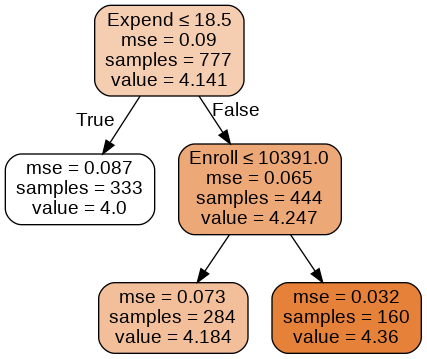

In [25]:
import pydotplus

dot_data = StringIO()

export_graphviz(regr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=["Enroll", "Expend"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

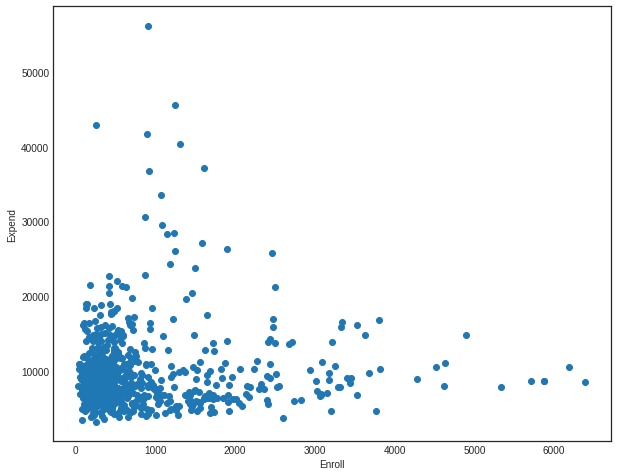

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(df['Enroll'], df["Expend"])
plt.xlabel("Enroll")
plt.ylabel("Expend")
plt.show()

### dtreeviz

Usando a [dtreeviz](https://github.com/parrt/dtreeviz):

In [28]:
!pip install dtreeviz

from dtreeviz.trees import *

  Stored in directory: /root/.cache/pip/wheels/4c/3f/87/b2c828617d1bd181145fbaf41129e4c82fa8d9a98082701e00
Successfully built dtreeviz


/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


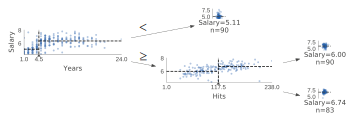

In [0]:
viz = dtreeviz(regr,
               X,
               y,
               target_name='Expend',
               feature_names=["Enroll", "Hits"],
               orientation ='LR',
               )
              
viz

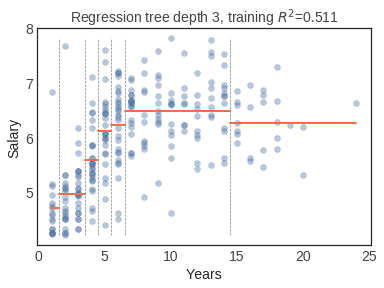

In [0]:
fig = plt.figure()
ax = fig.gca()
t = rtreeviz_univar(ax,
                    X[:,0], y,
                    max_depth=3,
                    feature_name='Years',
                    target_name='Salary',
                    fontsize=14)
plt.show()

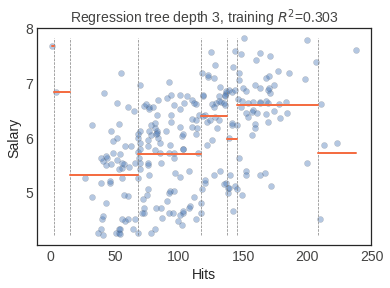

In [0]:
fig = plt.figure()
ax = fig.gca()
t = rtreeviz_univar(ax,
                    X[:,1], y,
                    max_depth=3,
                    feature_name='Hits',
                    target_name='Salary',
                    fontsize=14)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


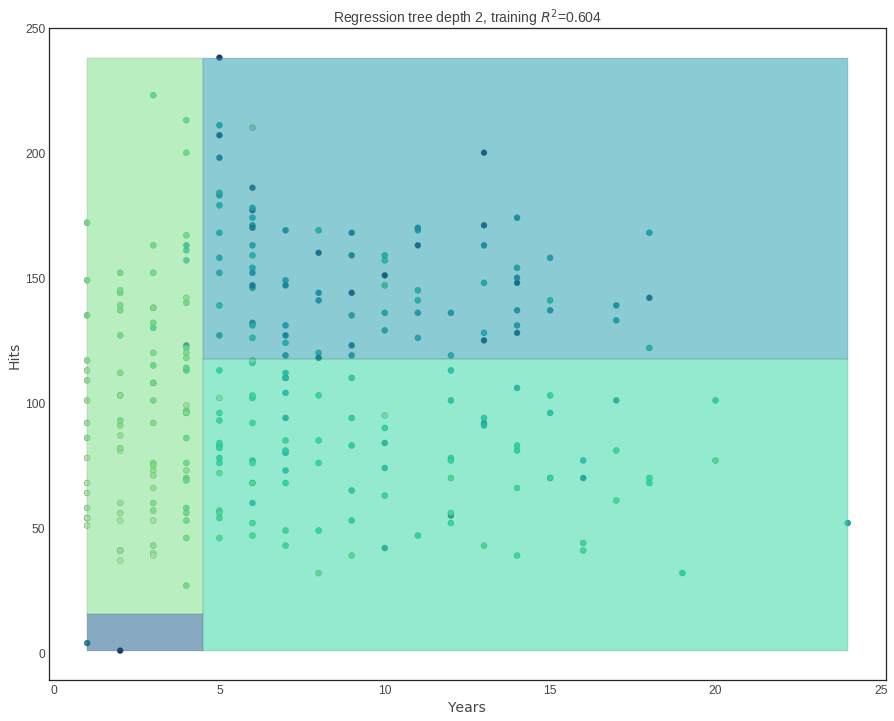

In [0]:
figsize = (15, 12)
fig, ax = plt.subplots(1, 1, figsize=figsize)
t = rtreeviz_bivar_heatmap(ax,
                           X, y,
                           max_depth=2,
                           feature_names=["Years", "Hits"],
                           fontsize=14)
plt.show()

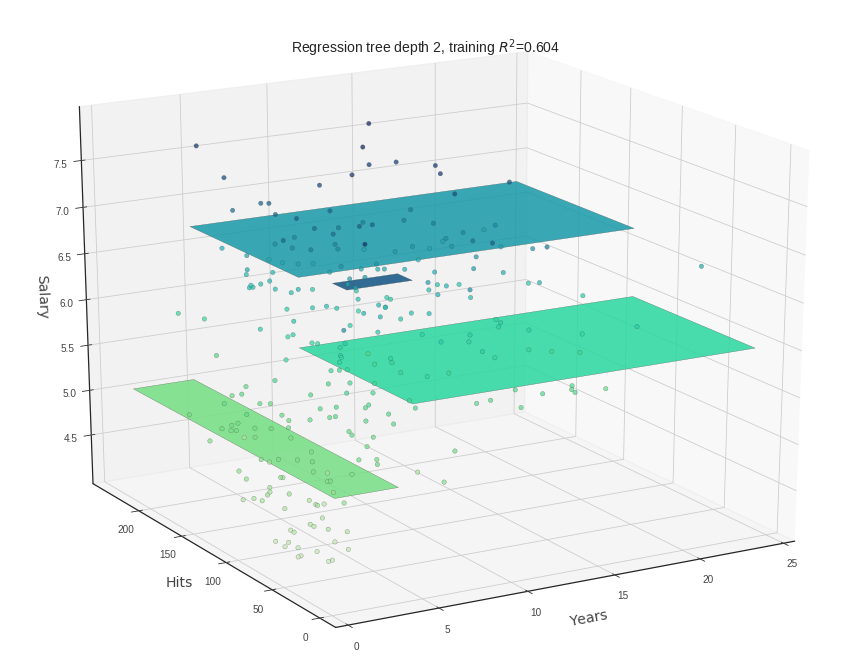

In [0]:
from mpl_toolkits.mplot3d import Axes3D

figsize = (15,12)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

t = rtreeviz_bivar_3D(ax,
                      X, y,
                      max_depth=2,
                      feature_names=['Years', 'Hits'],
                      target_name='Salary',
                      fontsize=14,
                      elev=20,
                      azim=240,
                      dist=9,
                      show={'splits', 'title'})
plt.show()

## Árbol entero

In [0]:
df.head().T

,-Alan Ashby,-Alvin Davis,-Andre Dawson,-Andres Galarraga,-Alfredo Griffin
AtBat,315,479,496,321,594
Hits,81,130,141,87,169
HmRun,7,18,20,10,4
Runs,24,66,65,39,74
RBI,38,72,78,42,51
Walks,39,76,37,30,35
Years,14,3,11,2,11
CAtBat,3449,1624,5628,396,4408
CHits,835,457,1575,101,1133
CHmRun,69,63,225,12,19


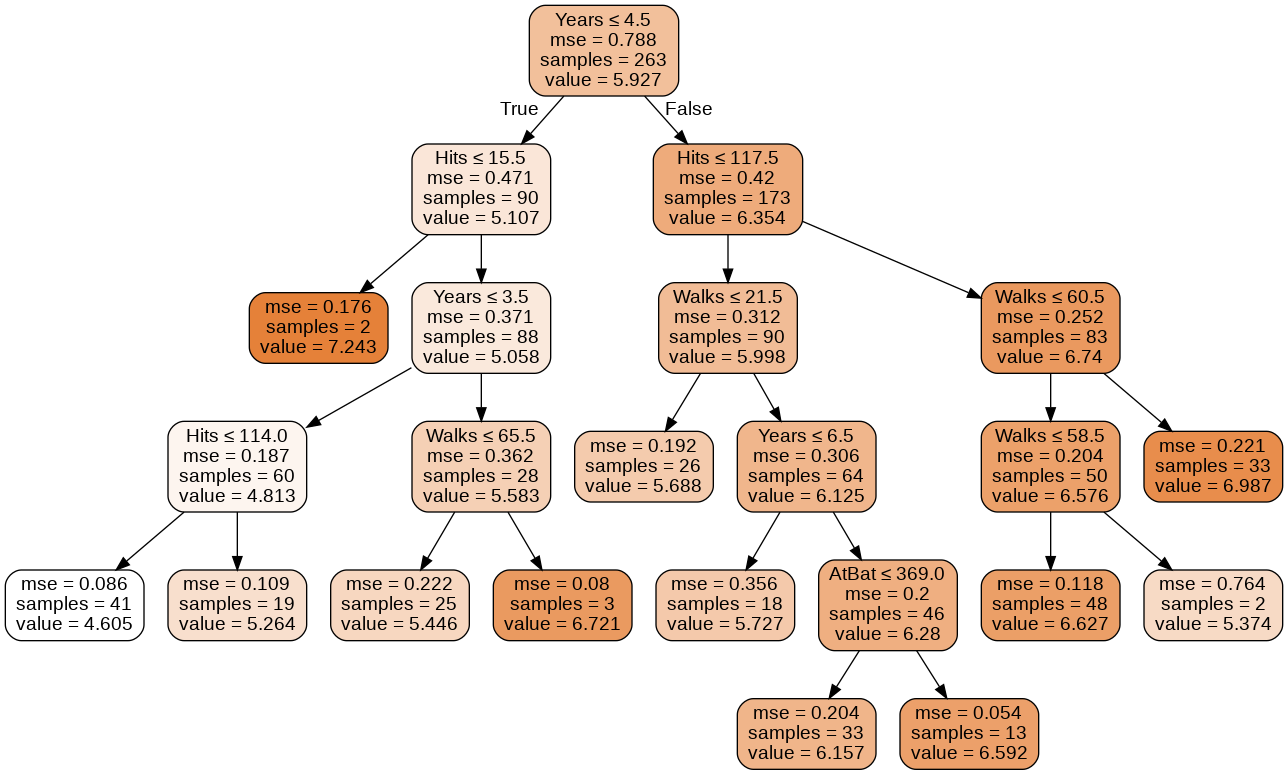

In [0]:
X = df[['Years', 'Hits', 'RBI', 'PutOuts', 'Walks', 'Runs', 'AtBat', 'HmRun', 'Errors']].as_matrix()
y = np.log(df.Salary.as_matrix())

regr = DecisionTreeRegressor(max_leaf_nodes=12)
regr.fit(X, y)

dot_data = StringIO()

export_graphviz(regr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=['Years', 'Hits', 'RBI', 'PutOuts', 'Walks', 'Runs', 'AtBat', 'HmRun', 'Errors'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Random forest y bagging

In [0]:
from sklearn.datasets import load_boston
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [0]:
boston = load_boston()

X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [0]:
regr = DecisionTreeRegressor(max_depth=3)
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

Text(0, 0.5, 'y_test')

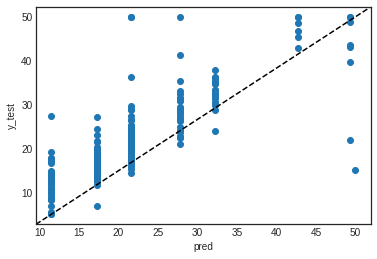

In [0]:
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
plt.show()

In [0]:
mean_squared_error(y_test, pred)

29.71302634064492

### Bagging

In [0]:
regr1 = RandomForestRegressor(max_features=13, random_state=42)
regr1.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=13, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

Text(0, 0.5, 'y_test')

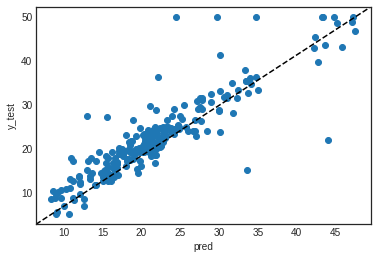

In [0]:
pred = regr1.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
plt.show()

In [0]:
mean_squared_error(y_test, pred)

17.08816758893281

### Random forest

In [0]:
13/3

4.333333333333333

In [0]:
regr2 = RandomForestRegressor(max_features=4, random_state=42)
regr2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

Text(0, 0.5, 'y_test')

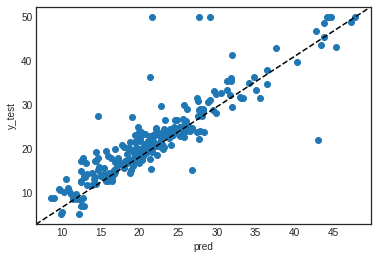

In [0]:
pred = regr2.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
plt.show()

In [0]:
mean_squared_error(y_test, pred)

16.989885770750988

## Importance

In [0]:
regr2.feature_importances_.sum()

1.0

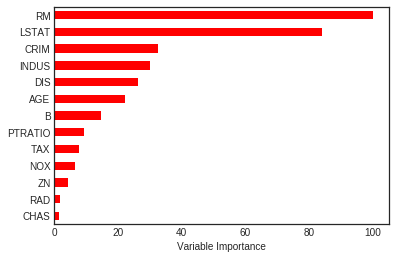

In [0]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100/regr2.feature_importances_.max()}, index=boston.feature_names)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [0]:
Importance.Importance.max()

29.31618368487422

## Boosting

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
regr = GradientBoostingRegressor(loss='ls', n_estimators=500, learning_rate=0.01, random_state=42)
regr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
mean_squared_error(y_test, regr.predict(X_test))

14.293578353352833

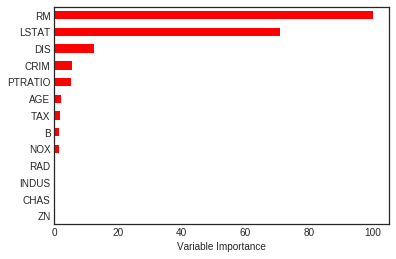

In [0]:
feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance/regr.feature_importances_.max(), index=boston.feature_names).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None